<a href="https://colab.research.google.com/github/Pk2911/Anomaly-Detection-for-Credit-Card-Fraud-Using-Isolation-Forests/blob/main/Anomaly_Detection_for_Credit_Card_Fraud_Using_Isolation_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# RA2211003010402
# Import necessary libraries
import pandas as pd
import gdown
from google.colab import drive

# Display options for file source
print("Choose the source for your dataset:")
print("1: Use Default dataset")
print("2: Use a file from Google Drive (mounted)")
print("Press Enter to use the default option (Google Drive link)")

# Get user input for file source
option = input("Enter your choice (1 or 2): ")

if option == '2':
    # Google Drive file mounting option
    drive.mount("/content/drive", force_remount=True)
    file_path = '/content/drive/My Drive/creditcard.csv'
else:
    # Google Drive link download option (default)
    # Google Drive file ID
    file_id = '1CBc1xp4q_5t_PktIIACS7fb43fVz5CwT'

    # Google Drive shared link
    drive_link = f'https://drive.google.com/uc?id={file_id}'

    # File path to save the downloaded file
    file_path = 'creditcard.csv'

    # Download the file from Google Drive
    gdown.download(drive_link, file_path, quiet=False)

Choose the source for your dataset:
1: Use Default dataset
2: Use a file from Google Drive (mounted)
Press Enter to use the default option (Google Drive link)
Enter your choice (1 or 2): 1


Downloading...
From (original): https://drive.google.com/uc?id=1CBc1xp4q_5t_PktIIACS7fb43fVz5CwT
From (redirected): https://drive.google.com/uc?id=1CBc1xp4q_5t_PktIIACS7fb43fVz5CwT&confirm=t&uuid=090873a2-b960-4614-95bb-fd8addd7786b
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:04<00:00, 32.4MB/s]


In [2]:
# Lab experiment 1
# Devise a program to import, load, and view a dataset
# Dataset should be 'creditcard.csv'

# Load the dataset
data = pd.read_csv(file_path, sep=',')

# View the last rows
print("Last rows of the dataset:")
print(data.tail())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

Last rows of the dataset:
            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.01

In [3]:
# Lab experiment 2
# Create a program to display the summary and statistics of the dataset

print("\nDataset Summary:")
# Print the dataset summary
print(data.info())

# Variance of each column
print("\nVariance of each column:")
print(data.var())

# Mode of each column
print("\nMode of each column:")
print(data.mode())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float

In [4]:
# Lab Experiment 3
# Implement linear regression to perform prediction with additional features

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # Using R-squared for evaluation

# Load dataset
try:
    data = pd.read_csv('creditcard.csv')
except FileNotFoundError:
    print("Error: The file 'creditcard.csv' was not found.")
    exit()

# Prepare features and target
X = data[['V4', 'V5', 'V6']]  # Different features
y = data['Class']

# Check if there are any missing values
if X.isnull().any().any() or y.isnull().any():
    print("Warning: Missing values found in the dataset. Consider handling them.")

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Predictions:", y_pred)

# Calculate and print R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Predictions: [ 0.08032682 -0.00124864 -0.00091687 ...  0.00065163 -0.00038043
  0.00683522]
R-squared Score: 0.031046845153112734


In [5]:
# Lab Experiment 4
# Implement Bayesian logistic regression and SVM for classification.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load and prepare the data
data = pd.read_csv('creditcard.csv')
X = data.drop('Class', axis=1)  # Features
y = data['Class']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lab Experiment A: Logistic Regression with L1 Regularization (Lasso)
model_logistic_l1 = LogisticRegression(penalty='l1', solver='saga', random_state=42)
model_logistic_l1.fit(X_train, y_train)

y_pred_logistic_l1 = model_logistic_l1.predict(X_test)
print(f'Logistic Regression with L1 Regularization Accuracy: {accuracy_score(y_test, y_pred_logistic_l1)}')
print(classification_report(y_test, y_pred_logistic_l1, zero_division=1))

# Lab Experiment B: SVM with RBF Kernel
model_svm_rbf = SVC(kernel='rbf', random_state=42)
model_svm_rbf.fit(X_train, y_train)

y_pred_svm_rbf = model_svm_rbf.predict(X_test)
print(f'SVM with RBF Kernel Accuracy: {accuracy_score(y_test, y_pred_svm_rbf)}')
print(classification_report(y_test, y_pred_svm_rbf, zero_division=1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression with L1 Regularization Accuracy: 0.9982795547909132
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       1.00      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

SVM with RBF Kernel Accuracy: 0.9982795547909132
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       1.00      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



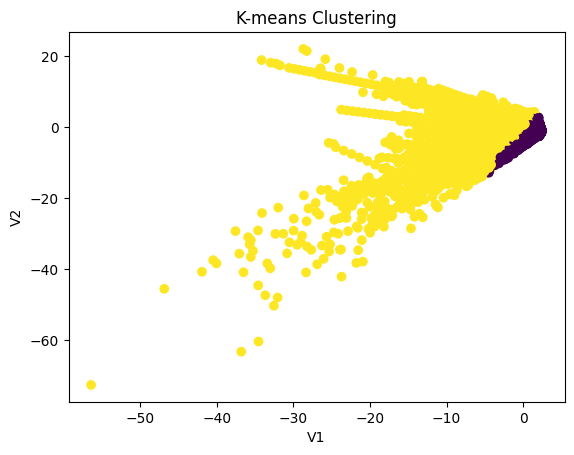

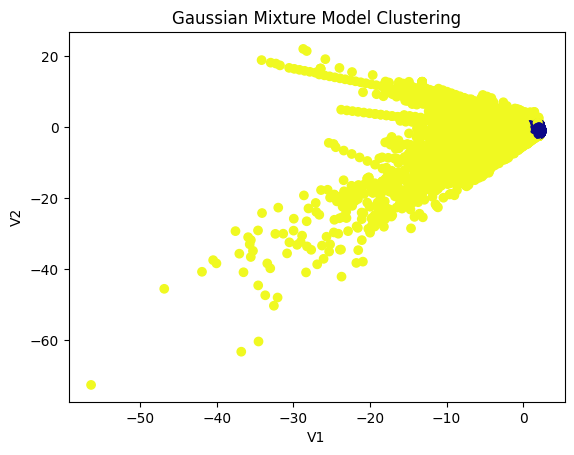

In [ ]:
#Lab Experiment 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

# Load dataset
data = pd.read_csv('creditcard.csv')
X = data.drop('Class', axis=1)
X_visual = X[['V1', 'V2']]

# K-means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_visual)
kmeans_labels = kmeans.labels_

plt.scatter(X_visual['V1'], X_visual['V2'], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_visual)
gmm_labels = gmm.predict(X_visual)

plt.scatter(X_visual['V1'], X_visual['V2'], c=gmm_labels, cmap='plasma')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_visual)

plt.scatter(X_visual['V1'], X_visual['V2'], c=hierarchical_labels, cmap='coolwarm')
plt.title('Hierarchical Clustering')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()


In [1]:
#Lab Exp 6
import numpy as np

# Define the hidden states and observable states
states = ["Rainy", "Sunny", "Cloudy"]
observations = ["Walk", "Shop", "Clean"]

# Number of states and observations
n_states = len(states)
n_observations = len(observations)

# Define transition matrix (probabilities of moving from one state to another)
transition_matrix = np.array([[0.5, 0.2, 0.3],  # Rainy to (Rainy, Sunny, Cloudy)
                              [0.3, 0.5, 0.2],  # Sunny to (Rainy, Sunny, Cloudy)
                              [0.2, 0.3, 0.5]]) # Cloudy to (Rainy, Sunny, Cloudy)

# Define emission matrix (probabilities of observable state given the hidden state)
emission_matrix = np.array([[0.6, 0.3, 0.1],  # Rainy emits (Walk, Shop, Clean)
                            [0.1, 0.4, 0.5],  # Sunny emits (Walk, Shop, Clean)
                            [0.2, 0.2, 0.6]]) # Cloudy emits (Walk, Shop, Clean)

# Define initial state distribution (probabilities of starting in each state)
initial_state_prob = np.array([0.4, 0.3, 0.3])

# Define the observation sequence (encoded as integers: 0: Walk, 1: Shop, 2: Clean)
observation_seq = [0, 1, 2, 0, 0, 1]

# Viterbi Algorithm Implementation
def viterbi(observation_seq, states, transition_matrix, emission_matrix, initial_state_prob):
    n_obs = len(observation_seq)
    n_states = len(states)

    # Initialize the probability table and path table
    V = np.zeros((n_states, n_obs))  # Store the probabilities
    path = np.zeros((n_states, n_obs), dtype=int)  # Store the backtracking path

    # Initialize the first column of V
    for s in range(n_states):
        V[s, 0] = initial_state_prob[s] * emission_matrix[s, observation_seq[0]]

    # Fill the V and path tables
    for t in range(1, n_obs):
        for s in range(n_states):
            prob_state = V[:, t-1] * transition_matrix[:, s] * emission_matrix[s, observation_seq[t]]
            V[s, t] = np.max(prob_state)
            path[s, t] = np.argmax(prob_state)

    # Find the most probable last state
    best_last_state = np.argmax(V[:, -1])

    # Backtrack to find the most probable state sequence
    best_path = [best_last_state]
    for t in range(n_obs-1, 0, -1):
        best_last_state = path[best_last_state, t]
        best_path.insert(0, best_last_state)

    return best_path, V

# Apply Viterbi to the observation sequence
best_path, V = viterbi(observation_seq, states, transition_matrix, emission_matrix, initial_state_prob)

# Convert numeric states to actual state names
predicted_states = [states[state] for state in best_path]
print("Observation sequence:", [observations[o] for o in observation_seq])
print("Predicted hidden states:", predicted_states)



Observation sequence: ['Walk', 'Shop', 'Clean', 'Walk', 'Walk', 'Shop']
Predicted hidden states: ['Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Rainy']


In [6]:
#Lab Experiment 7
#Implement HMM to predict the sequential data
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('creditcard.csv',sep=',')


df = df[['Time', 'Amount', 'Class']]

# Scale the data (normalize 'Time' and 'Amount' for better performance)
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

# Split observations and labels
observations = df[['Time', 'Amount']].values  # Sequential data (features)
labels = df['Class'].values  # 1 for fraud, 0 for non-fraud

# Hidden states: 0 = non-fraud, 1 = fraud
n_states = 2  # Number of hidden states (fraud, non-fraud)

# Define the Transition Matrix
A = np.array([[0.95, 0.05],  # non-fraud -> non-fraud, non-fraud -> fraud
              [0.10, 0.90]]) # fraud -> non-fraud, fraud -> fraud

# Initial probabilities (starting state probabilities)
pi = np.array([0.99, 0.01])  # Start with 99% confidence in non-fraud transactions

# Emission probabilities ( each state emits from a Gaussian distribution)
# Mean and variance for non-fraud state (0) and fraud state (1)
mean_non_fraud = [0, 0]  # Mean of Time and Amount for non-fraud state
cov_non_fraud = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix for non-fraud

mean_fraud = [2, 3]  # Mean of Time and Amount for fraud state (just an assumption)
cov_fraud = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix for fraud

# Function to compute emission probabilities assuming Gaussian distribution
def multivariate_gaussian(x, mean, cov):
    k = len(mean)
    diff = x - mean
    return (1.0 / (np.sqrt((2 * np.pi) ** k * np.linalg.det(cov)))) * \
            np.exp(-0.5 * diff.T @ np.linalg.inv(cov) @ diff)

# Emission probability for each state
def emission_probability(x, state):
    if state == 0:  # non-fraud state
        return multivariate_gaussian(x, mean_non_fraud, cov_non_fraud)
    else:  # fraud state
        return multivariate_gaussian(x, mean_fraud, cov_fraud)

# Viterbi algorithm to predict the sequence of hidden states
def viterbi(obs):
    n_obs = len(obs)
    T1 = np.zeros((n_states, n_obs))  # T1 stores the probabilities
    T2 = np.zeros((n_states, n_obs), dtype=int)  # T2 stores the back-pointers

    # Initialize base case (t == 0)
    for s in range(n_states):
        T1[s, 0] = pi[s] * emission_probability(obs[0], s)
        T2[s, 0] = 0

    # Dynamic programming
    for t in range(1, n_obs):
        for s in range(n_states):
            T1[s, t] = max(T1[prev_s, t-1] * A[prev_s, s] * emission_probability(obs[t], s)
                            for prev_s in range(n_states))
            T2[s, t] = np.argmax([T1[prev_s, t-1] * A[prev_s, s] for prev_s in range(n_states)])

    # Traceback to find the best path
    best_path = np.zeros(n_obs, dtype=int)
    best_path[-1] = np.argmax(T1[:, -1])

    for t in range(n_obs - 2, -1, -1):
        best_path[t] = T2[best_path[t + 1], t + 1]

    return best_path

# Apply the Viterbi algorithm on the transaction data
predicted_states = viterbi(observations)
# Add the predictions to the DataFrame for comparison
df['Predicted Class'] = predicted_states

# Print the first few rows of the DataFrame to see original and predicted data
print(df[['Time', 'Amount', 'Class', 'Predicted Class']].head(10))
# Compare the predicted states with the actual fraud labels
accuracy = np.mean(predicted_states == labels)
print(f'Accuracy of HMM: {accuracy * 100:.2f}%')



       Time    Amount  Class  Predicted Class
0 -1.996583  0.244964      0                0
1 -1.996583 -0.342475      0                0
2 -1.996562  1.160686      0                0
3 -1.996562  0.140534      0                0
4 -1.996541 -0.073403      0                0
5 -1.996541 -0.338556      0                0
6 -1.996499 -0.333279      0                0
7 -1.996436 -0.190107      0                0
8 -1.996436  0.019392      0                0
9 -1.996394 -0.338516      0                0
Accuracy of HMM: 99.83%


X_array shape:  (28481, 29)
Predictions:  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

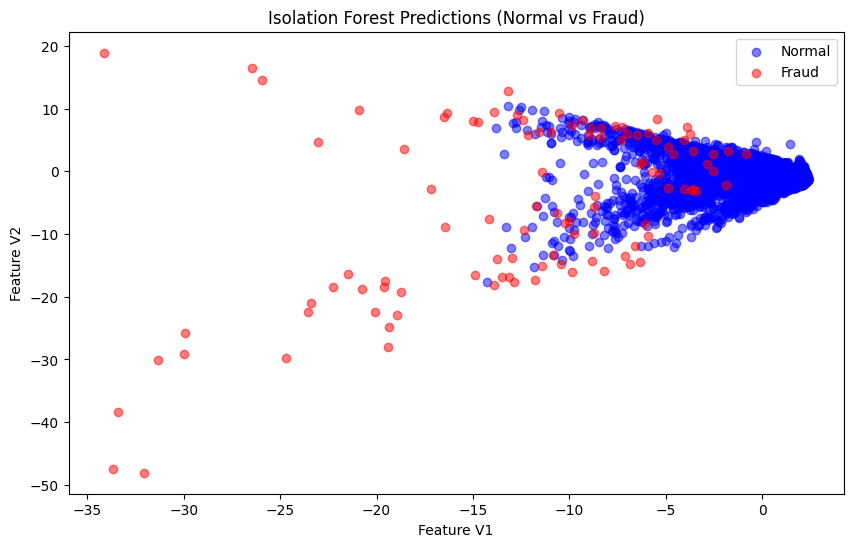

In [4]:
#Isolation Forest Algorithm for Prediction
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report  # Importing classification_report


# Load dataset
df = pd.read_csv('creditcard.csv')

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
X = df.drop(columns=['Class', 'Time'])  # Features (excluding labels and Time)
y = df['Class']  # Labels (fraud/non-fraud)

# Subsample data to avoid memory overload
X_sample = X.sample(frac=0.1, random_state=42)
y_sample = y[X_sample.index]

# Convert the dataframe to numpy arrays for processing
X_array = X_sample.values

# Check if X_array is correctly defined
print("X_array shape: ", X_array.shape)  # Make sure the shape is correct

# Node of the Isolation Tree
class IsolationTreeNode:
    def __init__(self, split_attribute=None, split_value=None, left=None, right=None, size=0, external=False):
        self.split_attribute = split_attribute
        self.split_value = split_value
        self.left = left
        self.right = right
        self.size = size
        self.external = external

# Isolation Tree class
class IsolationTree:
    def __init__(self, max_depth):
        self.max_depth = max_depth

    def fit(self, X, current_depth=0):
        if current_depth >= self.max_depth or len(X) <= 1:
            return IsolationTreeNode(size=len(X), external=True)

        num_features = len(X[0])
        split_attribute = random.randint(0, num_features - 1)
        min_value = min([x[split_attribute] for x in X])
        max_value = max([x[split_attribute] for x in X])

        if min_value == max_value:
            return IsolationTreeNode(size=len(X), external=True)

        split_value = random.uniform(min_value, max_value)
        left = [x for x in X if x[split_attribute] < split_value]
        right = [x for x in X if x[split_attribute] >= split_value]

        return IsolationTreeNode(
            split_attribute=split_attribute,
            split_value=split_value,
            left=self.fit(left, current_depth + 1),
            right=self.fit(right, current_depth + 1),
            size=len(X)
        )

    def path_length(self, x, node=None, current_length=0):
        if node is None:
            node = self.fit(x)  # Start from the root if no node provided
        if node.external:
            return current_length + c(node.size)
        if x[node.split_attribute] < node.split_value:
            return self.path_length(x, node.left, current_length + 1)
        else:
            return self.path_length(x, node.right, current_length + 1)

# Isolation Forest
class IsolationForest:
    def __init__(self, n_trees=100, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X):
        n_samples = len(X)
        self.max_depth = math.ceil(math.log2(n_samples))
        self.trees = [IsolationTree(self.max_depth).fit(X) for _ in range(self.n_trees)]

    def average_path_length(self, x):
        return sum([IsolationTree(self.max_depth).path_length(x, node=t) for t in self.trees]) / self.n_trees

    def anomaly_score(self, x, n):
        return 2 ** (-self.average_path_length(x) / c(n))

    def predict(self, X, threshold=0.5):
        n = len(X)
        return [1 if self.anomaly_score(x, n) > threshold else 0 for x in X]

# Harmonic number approximation for anomaly scoring
def c(n):
    if n <= 1:
        return 0
    return 2 * (math.log(n - 1) + 0.5772156649) - 2 * (n - 1) / n

# Initialize Isolation Forest
iso_forest = IsolationForest(n_trees=50)
iso_forest.fit(X_array)

# Prediction
y_pred = iso_forest.predict(X_array)
print("Predictions: ", y_pred)


# Convert y_pred to a numpy array for easy indexing
y_pred = np.array(y_pred)

# Generate classification report
print(classification_report(y_sample, y_pred))  # Add classification report here

# Plot the results in a 2D scatter plot

plt.figure(figsize=(10, 6))

# Plot normal transactions
plt.scatter(X_array[y_pred == 0][:, 0], X_array[y_pred == 0][:, 1],
            color='blue', label='Normal', alpha=0.5)

# Plot predicted frauds (anomalies)
plt.scatter(X_array[y_pred == 1][:, 0], X_array[y_pred == 1][:, 1],
            color='red', label='Fraud', alpha=0.5)

# Add labels and legend
plt.title('Isolation Forest Predictions (Normal vs Fraud)')
plt.xlabel('Feature V1')
plt.ylabel('Feature V2')
plt.legend()
plt.show()


In [7]:
# Local Outlier Factor Algorithm for Prediction
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import LocalOutlierFactor

# Load dataset
df = pd.read_csv('creditcard.csv')

# Data Preprocessing
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
X = df.drop(columns=['Class', 'Time'])  # Features (excluding labels and Time)
y = df['Class']  # Labels (fraud/non-fraud)

# Subsample data to avoid memory overload
X_sample = X.sample(frac=0.1, random_state=42)
y_sample = y[X_sample.index]

# Initialize and fit Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X_sample)

# Convert predictions to match the format of y (1 for outliers, 0 for inliers)
y_pred = np.where(y_pred == -1, 1, 0)

# Generate and print classification report
print(classification_report(y_sample, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.90      0.95     28435
           1       0.01      0.35      0.01        46

    accuracy                           0.90     28481
   macro avg       0.50      0.62      0.48     28481
weighted avg       1.00      0.90      0.95     28481



In [5]:
# K-Nearest Neighbors Algorithm for Anomaly Prediction
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv('creditcard.csv')

# Data Preprocessing
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
X = df.drop(columns=['Class', 'Time'])  # Features (excluding labels and Time)
y = df['Class']  # Labels (fraud/non-fraud)

# Subsample data to avoid memory overload
X_sample = X.sample(frac=0.1, random_state=42)
y_sample = y[X_sample.index]

# Initialize and fit k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sample, y_sample)

# Predict on the same sample (you can also use a test set)
y_pred = knn.predict(X_sample)

# Generate and print classification report
print(classification_report(y_sample, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.84      0.70      0.76        46

    accuracy                           1.00     28481
   macro avg       0.92      0.85      0.88     28481
weighted avg       1.00      1.00      1.00     28481

